<img align="right" style="max-width: 200px; height: auto" src="./fs_logo.png">

##  Lab 02 - Supervised Machine Learning

Seminar Künstliche Intelligenz, Frankfurt School, 2022

Die Analysen des Seminars **Künstliche Intelligenz** des Zertifikatstudiengangs **Certified Audit Data Scientist (CADS)** basieren auf Jupyter Notebook. Anhand solcher Notebooks ist es möglich eine Vielzahl von Datenanalysen und statistischen Validierungen durchzuführen.

<img align="center" style="max-width: 700px" src="./lab_02_banner.png">

Im letzten Lab haben Sie verschiedene Elemente der Python-Programmierung kennengelernt, z.B. Bedingungen, Schleifen und die Implementierung von Funktionen usw. In diesem dritten Lab werden wir unseren ersten **Supervised Machine Learning** Workflow mit dem in der Vorlesung vorgestellten **k Nearest-Neighbors (kNN)** Algorithmus erstellen.

Der *diskriminative* **k Nearest-Neighbors (kNN)**-Klassifikator ist ein einfacher, vielseitiger und leistungsstarker Algorithmus für das maschinelle Lernen. Bis vor kurzem, d.h. vor dem Aufkommen von Deep-Learning-Ansätzen, wurde er in einer Vielzahl von Anwendungen eingesetzt, z. B. im Finanzwesen für die Kreditwürdigkeitsprüfung oder der Paleographie zur Erkennung von Handschriften. 

Wir werden den **k Nearest-Neighbors (kNN)**-Klassifikator dazu verwenden, um zu lernen, Beobachtungen des **Iris Datensatzes** zu klassifizieren. Die folgende Abbildung zeigt einen Überblick über den Prozess des maschinellen Lernens, welchen wir in diesem Notebook erstellen:

<img align="center" style="max-width: 900px; height: auto" src="./splash.png">

Bei etwaigen Fragen wenden Sie sich, wie immer gerne an uns via **marco (dot) schreyer (at) unisg (dot) ch**. Wir wünschen Ihnen Viel Freude mit unseren Notebooks und Ihren revisorischen Analysen!

## Lernziele des Labs:

Nach der heutigen Übung sollten Sie in der Lage sein:

> 1. Den **Supervised Machine Learning** Workflow in Form eines Notebook zu erstellen.
> 2. Die Datengrundgesamtheiten für das **Trainieren** und **Bewerten** eines Klassifikators zu unterscheiden. 
> 3. Den **k Nearest-Neighbors (kNN)** Klassifikator zu trainieren und zu evaluieren.
> 4. Die Python **sklearn Bibliothek** zu verwenden, um beliebige Klassifikatoren zu trainieren bzw. zu optimieren.
> 5. Die **gewonnenen Ergebnisse** eines Klassifikators auszuwerten und zu interpretieren.

## 1. Einrichten der Anlyseumgebung

Ähnlich wie in den vorangegangenen Übungen müssen wir eine Reihe von Python-Bibliotheken importieren, die Datenanalyse und -visualisierung ermöglichen. In dieser Übung werden wir die Bibliotheken `Pandas`, `Numpy`, `Scikit-Learn`, `Matplotlib` und `Seaborn` verwenden. Nachfolgend importieren wir die benötigten Bibliotheken durch die Ausführung der folgenden Anweisungen:

In [172]:
# import the numpy, scipy and pandas data science library
import pandas as pd
import numpy as np
from scipy.stats import norm

# import sklearn data and data pre-processing libraries
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# import k-nearest neighbor classifier library
from sklearn.neighbors import KNeighborsClassifier

# import sklearn classification evaluation library
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

# import matplotlib data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

Aktivieren der sog. Inline-Darstellung von Visualisierungen in Jupyter-Notebook:

In [3]:
%matplotlib inline

Verwenden des `Seaborn` Visualisierungstil's in allen nachfolgenden Visualisierungen:

In [4]:
plt.style.use('seaborn')

Festlegen eines zufälligen Seeds zur Gewährleistung der Reproduzierbarkeit:

In [5]:
random_seed = 2222

## 2. Datenakquise und Datenaufbereitung

### 2.1 Datensatz Download und Assessment

Der **Iris-Datensatz** ist ein klassischer und einfacher Datensatz, der oft als "Hello World"-Beispiel in der Mehrklassen-Klassifikation verwendet wird. Dieser Datensatz besteht aus Messungen von drei verschiedenen Arten von Irisblüten (als **Klassen** bezeichnet), nämlich der Iris Setosa, der Iris Versicolour und der Iris Virginica, und ihrer jeweiligen gemessenen Blütenblatt- und Kelchblattlänge (als **Merkmale** bezeichnet).

<img align="center" style="max-width: 700px; height: auto" src="iris_dataset.png">

(Quelle: http://www.lac.inpe.br/~rafael.santos/Docs/R/CAP394/WholeStory-Iris.html)

Insgesamt besteht der Datensatz aus **150 Samples** (50 Samples pro Klasse) sowie den entsprechenden **4 verschiedenen Features**, die für jede Probe durchgeführt wurden. Nachfolgend, die Liste der einzelnen Features:

>- `Sepal length (cm)`
>- `Sepal width (cm)`
>- `Petal length (cm)`
>- `Petal width (cm)`

Further details of the dataset can be obtained from the following puplication: *Fisher, R.A. "The use of multiple measurements in taxonomic problems" Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to Mathematical Statistics" (John Wiley, NY, 1950)."*

Laden wir nun den Datensatz und führen wir ein erstes Assessment der erhaltenen Daten durch: 

In [6]:
iris = datasets.load_iris()

Ausgabe und Prüfen der vier im Datensatz enthaltenen Features:

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Ausgabe und Prüfen der Feature-Dimensionalität des Datensatzes:

In [8]:
iris.data.shape

(150, 4)

Ausgabe und Prüfen der Label-Dimensionalität des Datensatzes:

In [9]:
iris.target.shape

(150,)

Ausgabe und Prüfen der im Datensatz enthaltenen Klassen Labels:

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Let's briefly envision how the feature information of the dataset is collected and presented in the data:

<img align="center" style="max-width: 900px; height: auto" src="./feature_collection.png">

Ausgabe und Inspektion der ersten fünf Featurezeilen des Iris-Datensatzes:

In [11]:
pd.DataFrame(iris.data, columns=iris.feature_names).head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Ausgabe und Inspektion der korrespondierenden Labels der ersten fünf Featurezeilen des Iris-Datensatzes:

In [12]:
pd.DataFrame(iris.target, columns=["class"]).head(5)

,class
0,0
1,0
2,0
3,0
4,0


Im Folgenden, führen wir nun eine eingehendere Bewertung der Daten durch. Dazu visualisieren wir die Merkmalsverteilungen des Iris-Datensatzes entsprechend ihrer jeweiligen Klassenzugehörigkeit sowie die paarweisen Beziehungen der Merkmale.

Wir verwenden die Python-Bibliothek **Seaborn**, um eine solche Visualisierung zu erstellen, die auch als **Pairplot** bezeichnet wird. Die Seaborn Bibliothek ist eine leistungsstarke Datenvisualisierungsbibliothek, die auf der Matplotlib basiert. Sie bietet eine hervorragende Schnittstelle zum Zeichnen informativer statistischer Grafiken (https://seaborn.pydata.org). 

<Figure size 720x720 with 0 Axes>

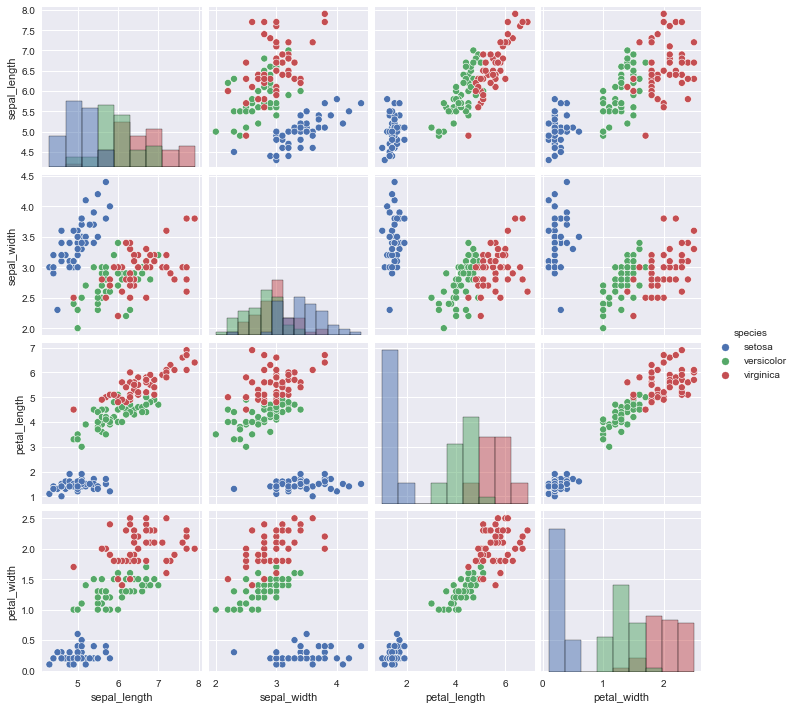

In [13]:
# init the plot
plt.figure(figsize=(10, 10))

# load the dataset also available in seaborn
iris_plot = sns.load_dataset("iris")

# plot a pairplot of the distinct feature distributions
sns.pairplot(iris_plot, diag_kind='hist', hue='species');

Aus dem erstellten Pairplot ist ersichtlich, dass die meisten Features, die der Blütenklasse `setosa` entsprechen, eine **lineare Trennbarkeit** von den Features der übrigen Blütenklassen aufweisen. Darüber hinaus weisen die Blütenklassen `versicolor` und `virginica` eine **nicht lineare Trennbarkeit** über alle gemessenen Features des Iris-Datensatzes auf.

### 2.3 Feature Skalierung des Datensatz

Betrachtet man die Featurewerte des **Iris-Datensatzes**, so stellt man fest, dass die jeweiligen Wertebereiche stark variieren. Dies stellt eine Herausforderung für abstandsbasierte Algorithmen wie den **k Nearest-Neighbors** Klassifikator dar. Solche Algorithmen berechnen den Abstand zwischen zwei Samples anhand eines Abstandsmaßes wie z.B. dem **Euklidischen** oder **Manhattan** Abstand.

Weist eines dieser Merkmale einen großen Wertebereich auf, dominiert der berechnete Abstand dieses speziellen Features die Funktion des Algorithmnus. Deshalb ist es notwendig den Wertebereich der verschiedenen Features zu skalieren, z.B. auf einen Wertebereich zwischen $[0,1]$ oder $[-1,1]$. Hierdurch ist gewährleistet, dass jedes Feature gleichwertig zum Ergebnis des Algorithmus beiträgt. Ein verbreitetes Verfahren zur Skalierung von Merkmalen wird als **Min-Max-Normalisierung** bezeichnet und ist durch folgende Formel definiert:

$$x'={\frac  {x-{\text{min}}(x)}{{\text{max}}(x)-{\text{min}}(x)}}$$

Skalieren wir nun die einzelnen Featurewerte des **Wein-Datensatzes** anhand der **Min-Max-Normalisierung** unter Verwendung der `MinMaxScaler` Funktionalität der `sklearn` Bibliothek:

In [21]:
# init the min-max scaler
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)

# min-max normalize the distinct feature values
iris_data_norm = scaler.fit_transform(iris.data)

Ausgabe und Prüfen der ersten 5 Merkmalszeilen des normalisierten Datensatzes:

In [25]:
pd.DataFrame(iris_data_norm, columns=iris.feature_names).head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


Wir können nun feststellen, dass die Merkmalswerte min-max skaliert wurden. Lassen Sie uns diese Beobachtung nun auch kurz statistisch validieren, d.h. um zu prüfen ob tatsächlich alle Merkmalswerte auf einen Wertebereich zwischen $[0,1]$ skaliert wurden:

In [26]:
pd.DataFrame(iris_data_norm, columns=iris.feature_names).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


Das Ergebnis schaut gut aus, d.h. alle Merkmalswerte liegen tatsächlich in einem Bereich zwischen $[0,1]$. Nachfolgend möchten wir das Ergebnis der neu skalierten Features auch einmal visuell analysieren:

<Figure size 720x720 with 0 Axes>

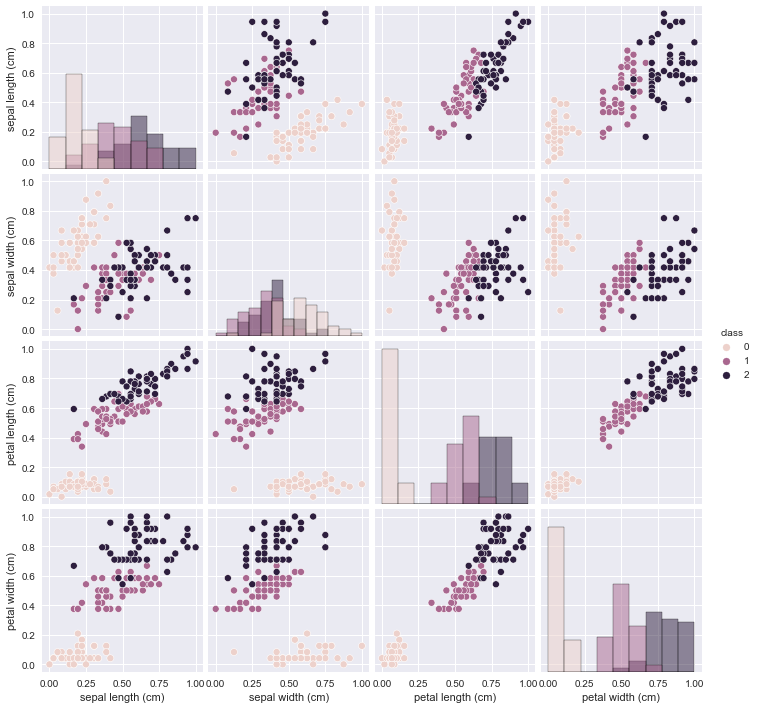

In [28]:
# init the plot
plt.figure(figsize=(10, 10))

# prepare the dataset to be plotable using seaborn

# convert to Panda's DataFrame
iris_plot = pd.DataFrame(iris_data_norm, columns=iris.feature_names)

# add class labels to the DataFrame
iris_plot['class'] = iris.target

# plot a pairplot of the distinct feature distributions
sns.pairplot(iris_plot, diag_kind='hist', hue='class');

Hervorragend, die verschiedenen Verteilungen der Merkmale blieben unverändert.

### 2.3 Training-Evaluation Split des Datensatz

Um die Qualität eines trainierten Modells des **überwachten maschinellen Lernens** zu verstehen und zu bewerten, empfiehlt es sich, den Datensatz in einen **Trainingsdatensatz** (der Teil der Datensätze, der ausschließlich zu Trainingszwecken verwendet wird) und eine **Evaluationsdatensatz** (der Teil der Datensätze, der ausschließlich zu Evaluierungszwecken verwendet wird) zu unterteilen. Der **Evaluationsdatensatz** wird dem Modell im Rahmen des Trainingsprozesses nicht gezeigt.

<img align="center" style="max-width: 500px; height: auto" src="./train_eval_dataset.png">

Im Folgenden definieren wir **30%** des ursprünglichen Datensatzes als Evaluationsdatensatz:

In [71]:
eval_fraction = 0.3

Randomly split the dataset into training set and evaluation set using sklearn's `train_test_split` function:

In [148]:
# 70% training and 30% evaluation
x_train, x_eval, y_train, y_eval = train_test_split(iris_data_norm, iris.target, test_size=eval_fraction, random_state=2222, stratify=None)

Ausgabe und Prüfen der Feature- und Label-Dimensionalität des Trainingsdatensatzes:

In [149]:
x_train.shape, y_train.shape

((105, 4), (105,))

Ausgabe und Prüfen der Feature- und Label-Dimensionalität des Evaluationsdatensatzes:

In [150]:
x_eval.shape, y_eval.shape

((45, 4), (45,))

## 3. k Nearest-Neighbor (kNN) Training

Ein beliebter (und bemerkenswert einfacher) Algorithmus ist der **k Nearest-Neighbors (kNN)** Algorithmus. Im Ergebnis liefert das Verfahren für jedes unbekannte Sample $x$ eine Klassenzugehörigkeit.

<img align="center" style="max-width: 800px; height: auto" src="./knn_algorithm.png">

Bevor wir den k Nearst-Neighbors zu Klassifikation eines Samples $x$ des Iris-Datensatzes anwenden schauen wir uns nochmals die einzelnen Schritte des Algorithmus an. Dabei gehen wir zunächst von folgenden Annahmen aus:

- Trainingsdatensatz $D$ bestehend aus Datensätzen $D=\{(x_1,y_1), (x_2, y_2), (x_3, y_3), ..., (x_n, y_n)\} \in \mathcal{R}^d$; 
- Verschiedene Klassen-Labels $C$, wobei $y_1$, $y_2$, …, $y_n$ $\in \{1, 2, …, C\}$.
- Durch den k Nearst-Neighbors Algorithmus zu klassifizierendes Sample $x \in \mathcal{R}^d$ . 

Basierend auf diesen Annahmen ist es möglich die nachfolgenden Schritte des **k Nearst-Neighbors**-Algorithmus durchzuführen:

>- **Schritt 1** - Für jedes Training-Sample $x_i$ berechne die Distanz $d(x_i, x)$ zwischen $x_i$ und $x$.
>- **Schritt 2** - Sortiere die Training-Samples $x_i$ in aufsteigender räumlicher Distanz zu $x$.
>- **Schritt 3** - Die $k$ räumlich nächsten Training-Samples werden als die k Nearest-Neighbors von $x$ bezeichnet.
>- **Schritt 4** - Die Klassifikation von $x$ erfolgt anhand der Klassenverteilung der k-Nearest Neighbors.

### 3.1. Hyperparameter Definition

Um den **k Nearest-Neighbors** Algorithmus zu parametrisieren definieren ist es zunächst notwendig die entsprechenden Hyperparameter zu definieren. Hierbei handelt es sich um Parameter, welche nicht durch das Modell im Rahmen des Training gelernt werden können. Für das Training des **k Nearest-Neighbors** Klassifikators ist es notwendig zwei Hyperparameter vorab zu definieren:

>1. Die Anzahl `k` der zu betrachtenden nächsten Nachbarn zur Klassifizierung eines Samples.
>2. Das Distanzmass `d(u, v)` zur Berechnung der Abstände zwischen den einzelnen Samples `u` und `v`. 


In einem ersten Schritt definieren wir die Anzahl der Nachbarn `k`, die im Rahmen der Klassifizierung eines Samples berücksichtigt werden sollen. Wir setzen diesen Parameter `k=4` und berücksichtigen somit im Rahmen der Klassifikation jeweils die vier nächsten Nachbarn eines Samples: 

In [151]:
k_nearest_neighbors = 4

In einem zweiten Schritt definieren wir das Distanzmass. Im Seminar wurden zur Berechnung des Abstands zwischen einem Sample $u$ und den $k$-ächsten Nachbarn $v'_{j}$ in einem $n$-dimensonalen Merkmalsraum die nachfolgenden Distanzmasse vorgestellt:

**Manhattan Distanz (L1-Norm):** $$ d(u, v)=\|\sum^k_{j=1}\sum^n_{i=1}(u_{i} - v_{j,i})\| $$

**Euklidischer Distanz (L2-Norm):** $$ d(u, v)=\sqrt{\sum^k_{j=1}\sum^n_{i=1}(u_{i} - v_{j,i})^2} $$

wobei der Index $j$ die Anzahl der $k$-Nächsten Nachbarn und der Index $i$ das $i$-te Merkmal eines einzelnen Samples $u_j$ bzw. $v_j$ bezeichnet. Nachfolgend verwenden wir die euklidische Distanz als Distanzmetrik des zu trainierenden **k Nearest-Neighbors** Klassifikators:

In [159]:
distance_metric = 'euclidean'

### 3.2. Model Training

Nach Definition der Hyperparameter initialisieren nun den **k Nearest-Neighbors** Algorithmus der [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) Bibliothek:

In [153]:
knn = KNeighborsClassifier(n_neighbors=k_nearest_neighbors, metric=distance_metric)

In einem nächsten Schritt, trainieren wir den Klassifikator auf Grundlage des Trainingsdatensatzes:

In [154]:
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

Nach erfolgreichem Training, verwenden wir das trainierte Modell um die Klassenlabel des ungesehenen Evaluationsdatens zu bestimmen:

In [211]:
y_pred = knn.predict(x_eval)

Werfen wir nun einen Blick auf die vorhergesagten Klassenlabels:

In [156]:
y_pred

array([0, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 2, 2, 0, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 2, 1, 1, 0, 2, 1,
       0])

Abschliessend vergleichen wir die vorhergesagten Klassenlabels mit den tatsächlichen **ground-truth** Klassenlabels:

In [157]:
y_eval

array([0, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 1,
       1, 0, 2, 2, 0, 2, 2, 1, 2, 2, 1, 0, 2, 0, 2, 1, 2, 1, 1, 0, 2, 1,
       0])

## 4. k Nearest-Neighbor (kNN) Evaluation

### 4.1 Accuracy Evaluation

In einem nächsten Schritt möchten wir nun die Güte des erlernten Modell's auch quantitiv zu evaluieren. Hierzu berechnen wir in die **Accuracy** des trainierten Modells auf Grundlage des Evaluationsdatensatzes:

In [163]:
print("Evaluation Accuracy, k=4: {} % ".format(metrics.accuracy_score(y_eval, y_pred)))

Evaluation Accuracy: 0.9333333333333333 % 


Darüber hinaus bestimmen wir auch die absolute Anzahl falsch klassifizierter Samples der Evaluationsdaten:

In [164]:
print("Number of mislabeled points out of a total {} points: {}".format(x_eval.shape[0], np.sum(y_eval != y_pred)))

Number of mislabeled points out of a total 45 points: 3


### 4.2 Confusion Matrix Evaluation

Für die genaue Beurteilung eines Modells wird im Kontext der statistischen Klassifikation oftmals eine sog. **Confusion Matrix** (Fehlermatrix) erstellt. Hierbei handelt es sich um eine Darstellung, welche die Performance eines Klassifikators über die unterschiedlichen Klassen visualisiert. In den Zeilen der Matrix werden für die Evaluationsdaten die Vorhersagen des Modells abgetragen. In den Spalten die tatsächlichen bzw. **Ground-Truth** Labels der Evaluationsdaten.

<img align="center" style="max-width: 300px; height: auto" src="./confusion_matrix.png">

(Quelle: https://en.wikipedia.org/wiki/Confusion_matrix)

Nachfolgend berechnen wir die **Confusion Matrix** unseres aktuellen **k Nearest-Neighbors** Modells mit den beiden Hyperparametern **k=4** und **Euklidischer-Distanz** auf Grundlage des Evaluationsdatensatzes:

In [169]:
# determine the prediction confusion matrix
mat = confusion_matrix(y_eval, y_pred)

Auch möchten wir die **Confusion Matrix** in einem nächsten Schritt und zu besseren Interpretation visualisueren: 

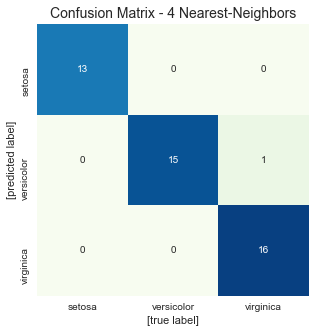

In [216]:
# init the plot
plt.figure(figsize=(5, 5))

# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='GnBu', xticklabels=iris.target_names, yticklabels=iris.target_names)

# add plot axis labels
plt.xlabel('[true label]')
plt.ylabel('[predicted label]')

# add plot title
plt.title('Confusion Matrix - 4 Nearest-Neighbors', fontsize=14);

Der Matrix ist zu entnehmen, dass es dem Modell nicht gelingt die beiden Klassen `virginica` und `versicolor` in allen Fällen fehlerfrei zu unterscheiden. Erinnern wir uns daran, dass wir im Rahmen des Seminars verschiedene Evaluationsmetriken z.B. **Präzision** und **Recall** zur Beurteilung der Qualität eines Modell's kennengelernt haben. Beide Metriken lassen sich nun aus der erstellten **Confusion Matrix** ableiten: 

>- Die **Precision**, formal definiert als Precision $=\frac{TP}{TP + FP}$, bezeichnet die Wahrscheinlichkeit, dass ein erhaltenes Dokument relevant ist.
>- Der **Recall**, formal definiert als Recall $=\frac{TP}{TP + FN}$, bezeichnet die Wahrscheinlichkeit das ein relevantes Dokument erhalten wurde.
>- Der **F1-Score**, formal definiert als F1-Score $= 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$, ist das harmonische Mittel aus beiden vorhergehenden Metriken.

In [173]:
print(classification_report(y_eval, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.83      1.00      0.91        15
           2       1.00      0.82      0.90        17

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45



### 4.3 Real-World Evaluation

Abschliessend möchten wir nun zwei **real-world** Iris Beispiele anhand unseres Modells klassifizieren.  

<img align="center" style="max-width: 200px; height: auto" src="./iris_sample_1.png">

(Quelle: https://de.wikipedia.org/wiki/Schwertlilien)

Die erste **Iris Beobachtung** $x^{1}$ (siehe oben) weist die folgenden (normalisierten) Featurewerte auf: $x^{1} = \{x_{1}=5.8, x_{2}=3.5, x_{3}=1.5, x_{4}=0.2\}$:

In [183]:
# init features of first iris flower observation 
sepal_length = 5.8 
sepal_width  = 3.5
petal_length = 1.5
petal_width  = 0.2

Anwendung unseres Modells auf den Featurevektor von $x^1$:

In [184]:
# determine class label prediction of the first unknown observation
class_prediction_sample_1 = knn.predict([[sepal_length, sepal_width, petal_length, petal_width]])

# convert predicted class label to class name
print(iris.target_names[class_prediction_sample_1[0]])

virginica


<img align="center" style="max-width: 200px; height: auto" src="./iris_sample_2.png">

(Quelle: https://de.wikipedia.org/wiki/Schwertlilien)

Die zweite **Iris Beobachtung** $x^{2}$ (siehe oben) weist die folgenden (normalisierten) Featurewerte auf: $x^{2} = \{x_{1}=7.8, x_{2}=2.3, x_{3}=6.4, x_{4}=2.5\}$:

In [185]:
# init features of first iris flower observation 
sepal_length = 7.8 
sepal_width  = 2.3
petal_length = 6.4
petal_width  = 2.5

Anwendung unseres Modells auf den Featurevektor von $x^2$:

In [177]:
# determine class label prediction of the second unknown observation
class_prediction_sample_2 = knn.predict([[sepal_length, sepal_width, petal_length, petal_width]])

# convert predicted class label to class name
print(iris.target_names[class_prediction_sample_2[0]])

virginica


## 5. k Nearest-Neighbor (kNN) Hyperparameter Optimierung

### 5.1 Hyperparameter Parameter Optimierung

Berücksichtigen der jeweils `k=8`nächsten Nachbarn eines Samples:

In [188]:
k_nearest_neighbors = 8

Initialisierung des **k Nearest-Neighbors** Algorithmus der [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) Bibliothek:

In [189]:
knn = KNeighborsClassifier(n_neighbors=k_nearest_neighbors, metric=distance_metric)

Training des Klassifikators auf Grundlage des Trainingsdatensatzes:

In [191]:
knn.fit(x_train, y_train);

Nach erfolgreichem Training, verwenden wir das trainierte Modell um die Klassenlabels des ungesehenen Evaluationsdatens zu bestimmen:

In [192]:
y_pred = knn.predict(x_eval)

Berchnung der **Accuracy** des trainierten Modells auf Grundlage des Evaluationsdatensatzes:

In [194]:
print('Evaluation Accuracy, k=8: {} %'.format(metrics.accuracy_score(y_eval, y_pred)))

Evaluation Accuracy, k=8: 0.9777777777777777 %


Ermittlung und Visualisierung der **Konfusionsmatrix** der einzelnen Vorhersagen:

In [195]:
# determine the prediction confusion matrix
mat = confusion_matrix(y_eval, y_pred)

Visualisierung der **Confusion Matrix** des **k=8 Nearest-Neighbor** modells auf Grundlage des Evaluationsdatensatzes:

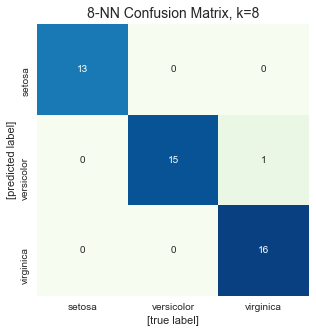

In [217]:
# init the plot
plt.figure(figsize=(5, 5))

# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='GnBu', xticklabels=iris.target_names, yticklabels=iris.target_names)

# add plot axis labels
plt.xlabel('[true label]')
plt.ylabel('[predicted label]')

# add plot title
plt.title('8-NN Confusion Matrix, k=8', fontsize=14);

Ermittlung der Evaluationsmetriken **Präzision** und **Recall** zur Beurteilung der Qualität eines Modell:

In [198]:
print(classification_report(y_eval, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### 5.2 Hyperparameter Parameter Grid-Search

Bislang haben wir den auf dem euklidischen Abstand basierenden k Nearest-Neighbor Algorithmus lediglich für zwei verschiedene Werte von $k=4$ und $k=8$ untersucht. Es stellt sich jedoch die Frage, ob wir einen Wert für k finden können, der in einer noch höheren Accuracy resultiert. 

In einem nächsten Schritt untersuchen wir deshalb die Performance des Algorithmus eines umfangreichen Intervalls von verschiedenen $k$-Werten und vergleichen die jeweils erhaltene Accuracy. Um eine solchen **Grid-Search** durchführen zu können definieren zunächst einen Array mit den verschiedenen zu evaluierenden $k$-Werten zwischen $k=1, ..., 30$:

In [205]:
# try k=1 through k=50 to be evaluated
k_range = range(1, 31)

In einem nächsten Schritt definieren wir eine Schleife, welche über die verschiedenen k-Werte iteriert. In jeder Iteration wird für den aktuellen k-Wert ein Modelltraining (unter Verwendung der Trainingsdaten) und die entsprechende Evaluation (unter Verwendung der Evaluationsdaten) durchgeführt. Nach erfolger Durchführung speichern die für den $k$-Wert zu erzielende Accuracy:

In [206]:
# init the distinct accuracy scores obtained on the evaluation data
eval_accuracy_scores = []

# iterate over the distinct k values
for k in k_range:
    
    # init the k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    
    # train the k-NN classifer on the training data
    knn.fit(x_train, y_train)
    
    # evaluate the k-NN classifier on the training data
    y_train_pred = knn.predict(x_train)
    
    # evaluate the k-NN classifier on the evaluation data
    y_eval_pred = knn.predict(x_eval)
    
    # collect the classification accuracy of the current k on the evaluation data
    eval_accuracy_scores.append(metrics.accuracy_score(y_eval, y_eval_pred))

Visualisierung der Accuracy für die verschiedenen $k$-Werte:

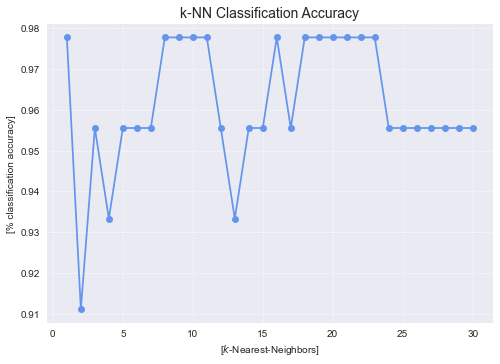

In [210]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot the classification accuracy of distinct k's
ax.plot(range(1, len(eval_accuracy_scores)+1), eval_accuracy_scores, color='cornflowerblue', marker='o')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("[$k$-Nearest-Neighbors]", fontsize=10)
ax.set_ylabel("[% classification accuracy]", fontsize=10)

# add plot title
ax.set_title('k-NN Classification Accuracy', fontsize=14);

## Lab Aufgaben:

Im Ihr wissen zu vertiefen empfehlen wir, die nachfolgenden Übungen zu bearbeiten:

**1. Trainieren, Evaluieren und Visualisieren Sie die Accuracy der k=1,...,50 Nearest-Neighbor Modelle.**

> Schreiben Sie eine Python-Schleife, die die Vorhersagegenauigkeit aller k Nearest-Neighbor Parametrisierungen im Bereich von k=1,...,50 ermittelt. Sammeln und visualisieren Sie die Vorhersagegenauigkeit jedes Modells und **vergleichen Sie die Ergebnisse**. Stellen Sie die Vorhersagegenauigkeit für jedes der oben genannten Modelle grafisch dar. Das Diagramm sollte die verschiedenen Werte von k auf der x-Achse und die entsprechende Modellvorhersagegenauigkeit auf der y-Achse anzeigen. Welches Verhalten in Bezug auf die Vorhersagegenauigkeit kann mit zunehmendem k beobachtet werden?

In [208]:
# ***************************************************
# Sie können Ihre Lösung an dieser Stelle einfügen
# ***************************************************

**2. Trainieren, Evaluieren und Visualisieren Sie die Accuracy der k=1,...,50 Nearest-Neighbor Modelle ohne Skalierung der Features.**

> Schreiben Sie eine Python-Schleife, die die Vorhersagegenauigkeit aller k Nearest-Neighbor Parametrisierungen im Bereich von k=1,...,50 ermittelt. Verwenden Sie für das Modelltraining diesmal die **nicht skalierten Features**. Sammeln und visualisieren Sie die Vorhersagegenauigkeit jedes Modells und vergleichen Sie die Ergebnisse. Stellen Sie die Vorhersagegenauigkeit für jedes der oben genannten Modelle grafisch dar. Das Diagramm sollte die verschiedenen Werte von k auf der x-Achse und die entsprechende Modellvorhersagegenauigkeit auf der y-Achse anzeigen. Wie verhalten sich die Ergebnisse im Vergleich zu Aufgabe 1?

In [ ]:
# ***************************************************
# Sie können Ihre Lösung an dieser Stelle einfügen
# ***************************************************

**3. Trainieren, Evaluieren und Visualisieren Sie die Accuracy der k=1,...,50 Nearest-Neighbor Modelle unter Verwendung der Manhattan Distanz.**

> Schreiben Sie eine Python-Schleife, die die Vorhersagegenauigkeit aller k Nearest-Neighbor Parametrisierungen im Bereich von k=1,...,50 ermittelt. Verwenden Sie für das Modelltraining diesmal die **Manhattan Distanz** anstatt der Euklidischen Distanz. Sammeln und visualisieren Sie die Vorhersagegenauigkeit jedes Modells und vergleichen Sie die Ergebnisse. Stellen Sie die Vorhersagegenauigkeit für jedes der oben genannten Modelle grafisch dar. Das Diagramm sollte die verschiedenen Werte von k auf der x-Achse und die entsprechende Modellvorhersagegenauigkeit auf der y-Achse anzeigen. Wie verhalten sich die Ergebnisse im Vergleich zu Aufgabe 1?

In [ ]:
# ***************************************************
# Sie können Ihre Lösung an dieser Stelle einfügen
# ***************************************************

## Lab Zusammenfassung

Dieses Notebook umfasste eine schrittweise Einführung in einige grundlegende Konzepte eines **Supervised Machine Learning** Prozesses in Jupyter Notebooks. Die vorgestellten Code Beispiele und die Übungen können als Ausgangspunkt für komplexere und Ihre massgeschneiderten Analysen dienen.